# Libraries

In [2]:
!pip install -U tensorboard_plugin_profile

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.2 MB 19.3 MB/s eta 0:00:01


In [3]:
pip install git+https://github.com/rabernat/xbatcher.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/rabernat/xbatcher.git to /tmp/pip-req-build-mtvhtd4_
  Created wheel for xbatcher: filename=xbatcher-0.1.0-py3-none-any.whl size=6244 sha256=be58aadf09c02d3ec9198e2eb67274b1d2bf1192cb83beb137db515d55c4e1f2
  Stored in directory: /tmp/pip-ephem-wheel-cache-p8o0on2l/wheels/0f/49/4c/0ecb2095c658d3b579c043c3be2b22c8740af6fab920456d6f
Successfully built xbatcher
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install git+https://github.com/rabernat/xbatcher.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/rabernat/xbatcher.git to /tmp/pip-req-build-n1kyb41o
  Created wheel for xbatcher: filename=xbatcher-0.1.0-py3-none-any.whl size=6244 sha256=80bb31fce5c0cc6bec23651535efd78a9d1807fb5e6670c288e3b129478ebec4
  Stored in directory: /tmp/pip-ephem-wheel-cache-08x3qxgq/wheels/0f/49/4c/0ecb2095c658d3b579c043c3be2b22c8740af6fab920456d6f
Successfully built xbatcher
Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib inline
import pandas as pd
import _pickle as pickle
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

print("TensorFlow version: ", tf.__version__)
import os
import sys 
import pickle as pk
import  pickle
from datetime import datetime
import pandas as pd
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
#import nctoolkit as ncµ
import netCDF4 as nc4
import threading
import datetime as dt  # Python standard library datetime  module
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import xbatcher as xb

import imageio
os.environ['PROJ_LIB'] = '/opt/python3-anaconda50-5.0.1-7ipsl.el6/share/proj'

import tensorflow as tf
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from skimage.measure import block_reduce


TensorFlow version:  2.2.0


In [2]:
#reload support file 
import sys
import os
py_file_location = "/home/dbennour/DeepPV/AECNN_Model/"
sys.path.append(os.path.abspath(py_file_location))
import read_cloudalbedo_files, cloud_index_functions, write_cloud_index_files, AECNN_model
import CAL_CMV_Generator
from read_cloudalbedo_files import *
from CAL_CMV_Generator import CAL_CMV_DataGenerator
from AECNN_model import *
import importlib
importlib.reload(read_cloudalbedo_files)
importlib.reload(CAL_CMV_Generator)
importlib.reload(AECNN_model)
# type(AECNN_model)
# importlib.reload(write_cloud_index_files)

<module 'AECNN_model' from '/home/dbennour/DeepPV/AECNN_Model/AECNN_model.py'>

In [3]:
%load_ext tensorboard

# Train/Test data

In [18]:
#Train data
dirout='/homedata/dbennour/DeepPV/CAL_CMV_slot/train_data/'
train_list=os.listdir('/homedata/dbennour/DeepPV/CAL_CMV_slot/train_data/')
train_datasets=[]
for file in file_list:
    train_datasets.append(xr.open_dataset(dirout+file))

In [ ]:
#Test data
test_path=r'/homedata/dbennour/DeepPV/CAL_CMV_annual/test_data/CAL_CMV_2020.nc'
test=xr.open_dataset(test_path)
test['CAL'].values


In [ ]:
test=xr.open_dataset('/homedata/dbennour/DeepPV/CAL_CMV_slot/train_data/CAL_CMV_201601010000_201601010015.nc')

In [ ]:
test.get(['CMV_X','CMV_Y'])

In [7]:
with xr.open_dataset('/homedata/dbennour/DeepPV/CAL_CMV_slot/train_data/CAL_CMV_201601010000_201601010015.nc') as test:
    inpuut=test[['CAL_T0','CAL_T0-15']]
    output=test[['CMV_X','CMV_Y']]
    test.load()
    

In [12]:
in_arr=inpuut.to_array().values

In [3]:
#Train/Test samples
train_list=os.listdir('/homedata/dbennour/DeepPV/CAL_CMV_slot/train_data/')[:50]
test_list=sorted(os.listdir('/homedata/dbennour/DeepPV/CAL_CMV_slot/test_data/'))[:10]
dirout='/homedata/dbennour/DeepPV/CAL_CMV_slot/train_data/'
# X_train_datasets=[]
# Y_train_datasets=[]
# X_train=np.empty((len(train_list),513,513,2))
# Y_train=np.empty((len(train_list),513,513,2))
# for i,file in enumerate(train_list):
# #     X_train_datasets.append(xr.open_dataset(dirout+file)[['CAL_T0']].to_array().values)
# #     X_train_datasets.append(xr.open_dataset(dirout+file)[['CAL_T0-15']].to_array().values)
# #     Y_train_datasets.append(xr.open_dataset(dirout+file)[['CMV_X','CMV_Y']].to_array().values)
#     X_train[i,:,:,0]=xr.open_dataset(dirout+file)[['CAL_T0']].to_array().values
#     X_train[i,:,:,1]=xr.open_dataset(dirout+file)[['CAL_T0-15']].to_array().values
#     Y_train[i,:,:,0]=xr.open_dataset(dirout+file)[['CMV_X']].to_array().values
#     Y_train[i,:,:,1]=xr.open_dataset(dirout+file)[['CMV_Y']].to_array().values
    

X_test_datasets=[]
# Y_test_datasets=[]
# X_test=np.empty((len(test_list),513,513,2))
# Y_test=np.empty((len(test_list),513,513,2))
dirout_test='/homedata/dbennour/DeepPV/CAL_CMV_slot/test_data/'
for i,file in enumerate(test_list):
    X_test_datasets.append(xr.open_dataset(dirout_test+file)['CAL_T0'].values)
#     Y_test_datasets.append(xr.open_dataset(dirout_test+file)[['CMV_X','CMV_Y']].to_array().values)
#     X_test[i,:,:,0]=xr.open_dataset(dirout_test+file)[['CAL_T0']].to_array().values
#     X_test[i,:,:,1]=xr.open_dataset(dirout_test+file)[['CAL_T0-15']].to_array().values
#     Y_test[i,:,:,0]=xr.open_dataset(dirout_test+file)[['CMV_X']].to_array().values
#     Y_test[i,:,:,1]=xr.open_dataset(dirout_test+file)[['CMV_Y']].to_array().values
X_test=np.array(X_test_datasets).reshape((-1,513,513,1))

In [22]:
X_test.shape

(100, 513, 513, 1)

In [19]:
xr.open_dataset(dirout_test+file)['CAL_T0'].values

array([[18, 14, 11, ..., 67, 71, 66],
       [16, 19, 17, ..., 70, 72, 69],
       [22, 27, 23, ..., 68, 67, 67],
       ...,
       [56, 58, 61, ...,  4,  3,  5],
       [61, 58, 61, ...,  2,  4,  4],
       [58, 59, 64, ...,  3,  4,  7]], dtype=int8)

In [5]:
# X_train=np.array(X_train_datasets).reshape((-1, 513, 513, 2))
# Y_train=np.array(Y_train_datasets).reshape((-1, 513, 513, 2))
# X_test=np.array(X_test_datasets).reshape((-1, 513, 513, 2))
# Y_test=np.array(Y_test_datasets).reshape((-1, 513, 513, 2))

In [6]:
X_train[0].shape

(513, 513, 2)

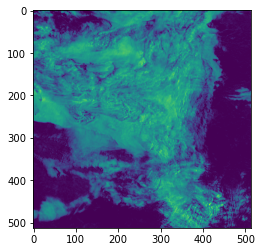

In [9]:
%matplotlib inline
plt.imshow(X_train[49,:,:,1])

In [ ]:
xr.open_dataset('/homedata/dbennour/DeepPV/CAL_CMV_slot/train_data/CAL_CMV_201601171115_201601171130.nc').to_array().values

## Data Generator

In [4]:
data_path='/homedata/dbennour/DeepPV/CAL_CMV_slot/'
data_generator_train = CAL_CMV_DataGenerator('train_data', data_path,to_fit=True,batch_size=32)
data_generator_val=CAL_CMV_DataGenerator('val_data', data_path,to_fit=True,batch_size=32)
data_generator_test=CAL_CMV_DataGenerator('test_data', data_path,to_fit=False,batch_size=32)

In [5]:
data_generator_train

In [ ]:
# generator = data_generator_train.flow(batch_size=32)

# Model 1: Convolutional auto-encoder


In [6]:
import  AECNN_model
importlib.reload(AECNN_model)

<module 'AECNN_model' from '/home/dbennour/DeepPV/AECNN_Model/AECNN_model.py'>

In [7]:
autoencoder=AECNN_build()

In [8]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 513, 513, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 513, 513, 32)      544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 257, 257, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 257, 257, 16)      8208      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 129, 129, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 129, 129, 8)       2056      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 65, 65, 8)         0     

In [9]:
 history=AECNN_fit(autoencoder,data_generator_train,data_generator_val,1)

1355/1355 [==============================] - 9545s 7s/step - loss: 0.6930 - root_mean_squared_error: 0.3664 - mse: 0.1364 - val_loss: 0.6912 - val_root_mean_squared_error: 0.3683 - val_mse: 0.1377


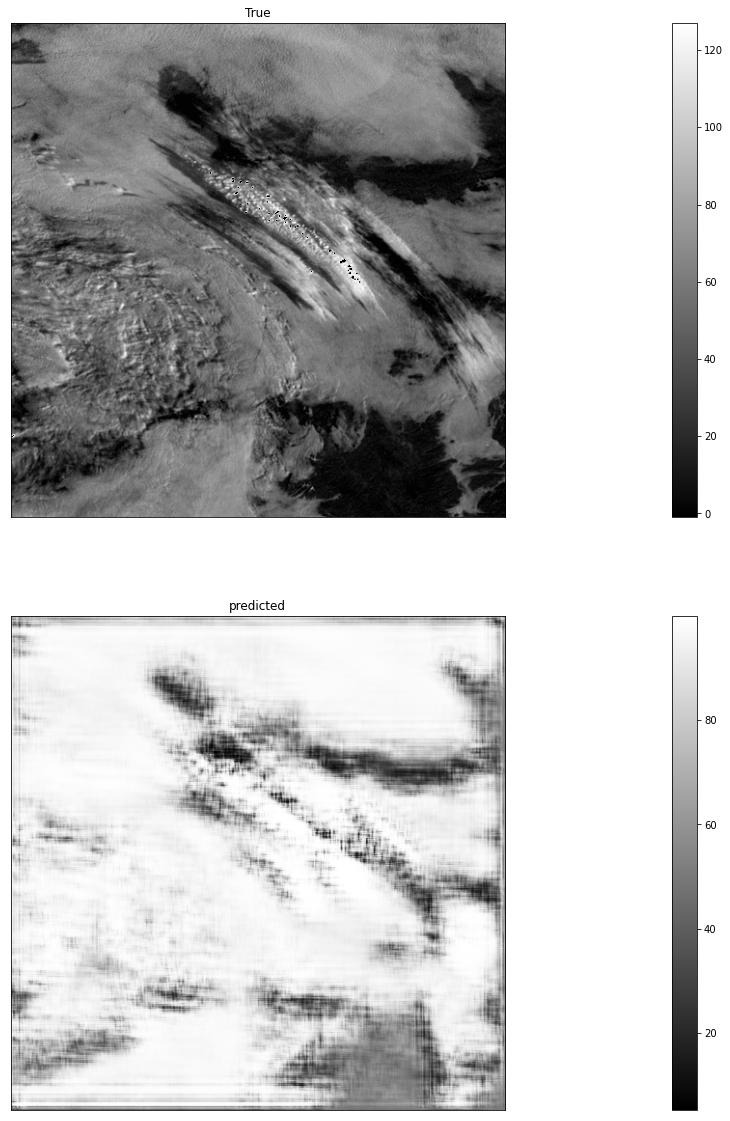

In [16]:
# decoded_imgs = autoencoder.predict(data_generator_test)
decoded_imgs = autoencoder.predict(X_test)
%matplotlib inline
n =1
plt.figure(figsize=(60, 20))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    im1=plt.imshow(X_test[i,:,:,0],cmap='gray',vmin=-1)
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('True')
    plt.colorbar(im1)
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    im2=plt.imshow(decoded_imgs[i,:,:,0]*100,cmap='gray')
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('predicted')
    plt.colorbar(im2)
plt.show()


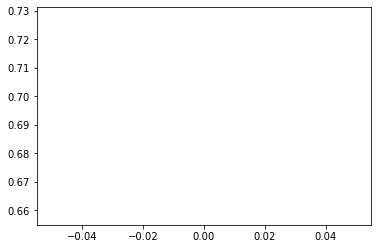

In [11]:
plt.plot(history.history['loss'])

In [12]:
saveModel(autoencoder,"AECNN_v3.4")

Yaml Model  AECNN_v3.3 .yaml saved to disk
Weights  AECNN_v3.3 .h5 saved to disk


# Model 2: LSTM 